In [984]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, svm
from sklearn.tree.export import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, classification_report , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [2]:
pima_df_del = pd.read_csv('/root/nims_academy/Pima/data/diabetes.csv')

In [655]:
pima_df.Glucose = pima_df.Glucose.fillna(100)
pima_df.BMI = pima_df.BMI.fillna(pima_df.BMI.mean())
pima_df.BloodPressure = pima_df.BloodPressure.fillna(int(pima_df.BloodPressure.mean()))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [668]:
pima_df.describe()
# Glucose, BloodPressure, SkinThinkness, Insuin, BMI는 정상적으로 0이 나올 수 없으므로 결측치로 봐야한다.
# 따라서, 먼저 결측치인 row를 전부 제거 후 예측한 뒤 0인 상태를 가지고 예측을 할 생각이다.
# 사용할 기계학습 기법은 SVM, Logistic Regression, Decision Tree, LDA, KNN를 사용할 것이다.
pima_df.BloodPressure = pima_df.BloodPressure.astype(int)

# NULL인 row를 전부 제거하기

In [272]:
pima_df_del = pd.read_csv('/root/nims_academy/Pima/data/diabetes.csv')

In [273]:
pima_df_del.Glucose.replace(0, np.nan, inplace = True)
pima_df_del.BloodPressure.replace(0, np.nan, inplace = True)
pima_df_del.SkinThickness.replace(0, np.nan, inplace = True)
pima_df_del.Insulin.replace(0, np.nan, inplace = True)
pima_df_del.BMI.replace(0, np.nan, inplace = True)

In [274]:
pima_df_del.describe()
# 다시 확인해보면, 0이 제거되어 정상적으로 값이 나오는 것을 확인 할 수 있다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [275]:
print('Null in Glucose : ', pima_df_del.Glucose.isnull().sum())
print('Null in BloodPressure : ', pima_df_del.BloodPressure.isnull().sum())
print('Null in SkinThickness : ', pima_df_del.SkinThickness.isnull().sum())
print('Null in Insulin : ', pima_df_del.Insulin.isnull().sum())
print('Null in BMI : ', pima_df_del.BMI.isnull().sum())

Null in Glucose :  5
Null in BloodPressure :  35
Null in SkinThickness :  227
Null in Insulin :  374
Null in BMI :  11


In [276]:
pima_df_del.dropna(inplace = True)

In [277]:
pima_df_del.reset_index(inplace = True)

In [278]:
pima_df_del.shape
# 하나라도 결측치가 포함된 row를 전부 제거하여 데이터 셋이 768개에서 392개로 줄어든 것을 볼 수 있다.

(392, 10)

In [279]:
print('Null in Glucose : ', pima_df_del.Glucose.isnull().sum())
print('Null in BloodPressure : ', pima_df_del.BloodPressure.isnull().sum())
print('Null in SkinThickness : ', pima_df_del.SkinThickness.isnull().sum())
print('Null in Insulin : ', pima_df_del.Insulin.isnull().sum())
print('Null in BMI : ', pima_df_del.BMI.isnull().sum())
# 모든 결측치 제거 확인

Null in Glucose :  0
Null in BloodPressure :  0
Null in SkinThickness :  0
Null in Insulin :  0
Null in BMI :  0


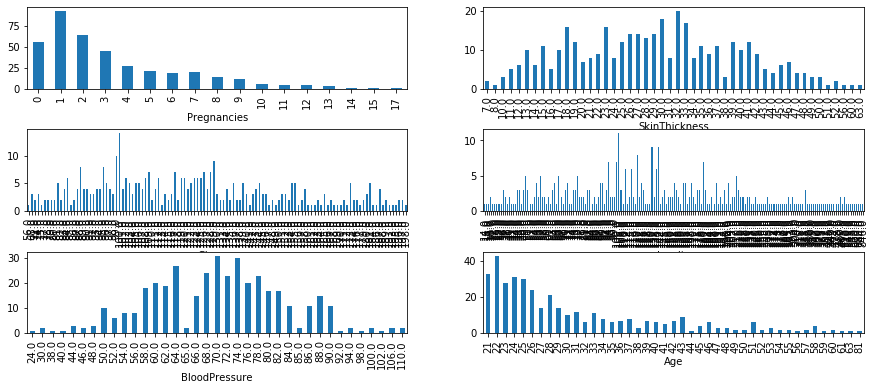

In [280]:
fig1, axes = plt.subplots(3, 2)
pima_df_del.groupby(['Pregnancies']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[0, 0], figsize = (15, 6))
pima_df_del.groupby(['Glucose']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[1, 0], figsize = (15, 6))
pima_df_del.groupby(['BloodPressure']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[2, 0], figsize = (15, 6))
pima_df_del.groupby(['SkinThickness']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[0, 1], figsize = (15, 6))
pima_df_del.groupby(['Insulin']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[1, 1], figsize = (15, 6))
pima_df_del.groupby(['Age']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[2, 1], figsize = (15, 6))

plt.subplots_adjust(hspace = 0.5)

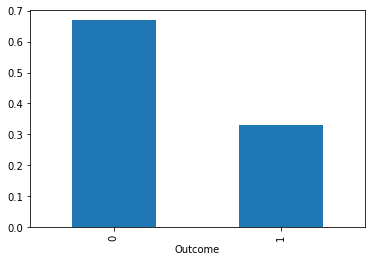

In [281]:
(pima_df_del.groupby(['Outcome']).count()/392).iloc[:, 0].plot(kind = 'bar')

In [282]:
print((pima_df_del.Outcome == 1).sum()/392)
print((pima_df_del.Outcome == 0).sum()/392)
# 30%의 데이터 불균형 발생 확인

0.33163265306122447
0.6683673469387755


In [463]:
outcome = pima_df_del['Outcome']
data=pima_df_del[pima_df_del.columns[:8]]
train,test=train_test_split(pima_df_del,test_size=0.25,random_state=0,stratify=pima_df_del['Outcome'])
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [523]:
test_Y.shape

(98,)

Accuracy of SVM :  0.673469387755102
Accuracy of Logistic :  0.7755102040816326
Accuracy of DT :  0.7142857142857143


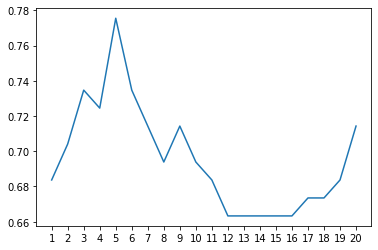

Accuracies for different values of n are: [0.68367347 0.70408163 0.73469388 0.7244898  0.7755102  0.73469388
 0.71428571 0.69387755 0.71428571 0.69387755 0.68367347 0.66326531
 0.66326531 0.66326531 0.66326531 0.66326531 0.67346939 0.67346939
 0.68367347 0.71428571]
Accuracy of KNN :  0.7755102040816326
Accuracy of LDA :  0.7959183673469388


In [537]:
model_svm=svm.SVC()
model_svm.fit(train_X, train_Y)
predict_svm = model_svm.predict(test_X)
# result_svm = cross_val_score(model_svm, X, Y, cv = kfold, scoring = 'accuracy')
# print("Cross Corelation of SVM : ", result_svm.mean())
print("Accuracy of SVM : ", (test_Y == predict_svm).sum()/98)
result_svm = (test_Y == predict_svm).sum()/98

model_Logistic = LogisticRegression()
model_Logistic.fit(train_X,train_Y)
prediction_Logistic = model_Logistic.predict(test_X)
# result_Logistic = cross_val_score(model_Logistic, X, Y, cv = kfold, scoring = 'accuracy')
# print("Cross Corelation of LogisticRegression : ", result_Logistic.mean())
print("Accuracy of Logistic : ", (test_Y == prediction_Logistic).sum()/98)
result_Logistic = (test_Y == prediction_Logistic).sum()/98

model_DT = DecisionTreeClassifier()
model_DT.fit(train_X,train_Y)
prediction_DT = model_DT.predict(test_X)
# result_DT = cross_val_score(model_DT, X, Y, cv = kfold, scoring = 'accuracy')
print("Accuracy of DT : ", (test_Y == prediction_DT).sum()/98)
result_DT = (test_Y == prediction_DT).sum()/98

node_num_idx = [i for i in range(1, 21)]
node_num = pd.Series()
for i in list(range(1,21)):
    model_KNN = KNeighborsClassifier(n_neighbors=i) 
    model_KNN.fit(train_X, train_Y)
    prediction = model_KNN.predict(test_X)
    node_num = node_num.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
    
    
plt.plot(node_num_idx, node_num)
plt.xticks(node_num_idx)
plt.show()
print('Accuracies for different values of n are:',node_num.values)

model_KNN = KNeighborsClassifier(n_neighbors=5) 
model_KNN.fit(train_X, train_Y)
prediction_KNN = model_KNN.predict(test_X)
# result_KNN = cross_val_score(model_KNN, X, Y, cv = kfold, scoring = 'accuracy')
print("Accuracy of KNN : ", (test_Y == prediction_KNN).sum()/98)
result_KNN = (test_Y == prediction_KNN).sum()/98

model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(train_X,train_Y)
prediction_LDA = model_LDA.predict(test_X)
# result_LDA = cross_val_score(model_LDA, X, Y, cv = kfold, scoring = 'accuracy')
print("Accuracy of LDA : ", (test_Y == prediction_LDA).sum()/98)
result_LDA = (test_Y == prediction_LDA).sum()/98


# NULL인 row를 그대로 사용하기

In [538]:
pima_df_use = pd.read_csv('/root/nims_academy/Pima/data/diabetes.csv')

In [539]:
pima_df_use.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## First, We plot it!!!

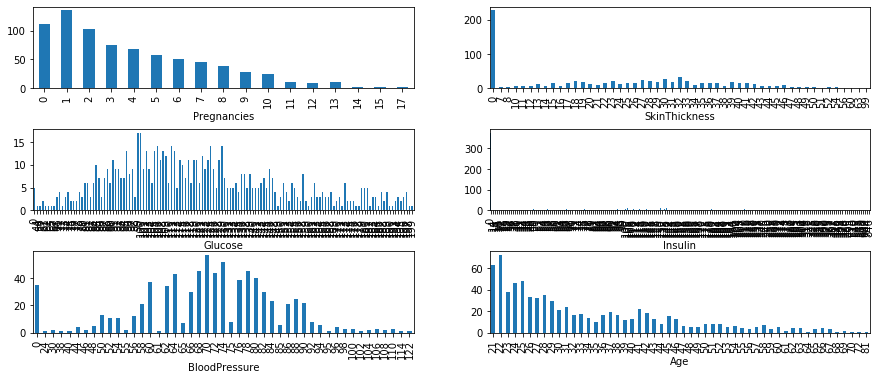

In [540]:
fig2, axes = plt.subplots(3, 2)
pima_df_use.groupby(['Pregnancies']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[0, 0], figsize = (15, 6))
pima_df_use.groupby(['Glucose']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[1, 0], figsize = (15, 6))
pima_df_use.groupby(['BloodPressure']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[2, 0], figsize = (15, 6))
pima_df_use.groupby(['SkinThickness']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[0, 1], figsize = (15, 6))
pima_df_use.groupby(['Insulin']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[1, 1], figsize = (15, 6))
pima_df_use.groupby(['Age']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[2, 1], figsize = (15, 6))

plt.subplots_adjust(hspace = 0.5)

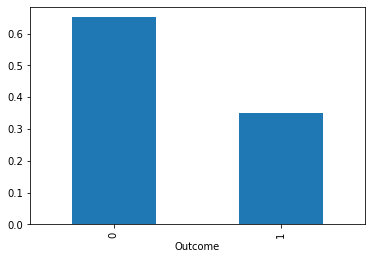

In [541]:
(pima_df_use.groupby(['Outcome']).count()/768).iloc[:, 0].plot(kind = 'bar')

In [542]:
outcome = pima_df_use['Outcome']
data=pima_df_use[pima_df_use.columns[:8]]
train,test=train_test_split(pima_df_use,test_size=0.25,random_state=0,stratify=pima_df_use['Outcome'])
train_X_use=train[train.columns[:8]]
test_X_use=test[test.columns[:8]]
train_Y_use=train['Outcome']
test_Y_use=test['Outcome']

In [543]:
test_Y_use.shape

(192,)

Accuracy of SVM :  0.6510416666666666
Accuracy of Logistic :  0.0
Accuracy of DT :  0.78125


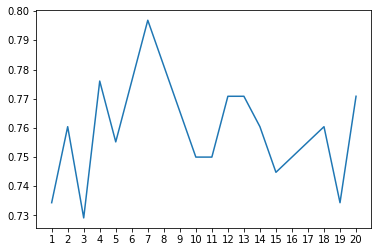

Accuracies for different values of n are: [0.734375   0.76041667 0.72916667 0.77604167 0.75520833 0.77604167
 0.796875   0.78125    0.765625   0.75       0.75       0.77083333
 0.77083333 0.76041667 0.74479167 0.75       0.75520833 0.76041667
 0.734375   0.77083333]
Accuracy of KNN :  0.7760416666666666
Accuracy of LDA :  0.78125


In [569]:
model_svm_use = svm.SVC()
model_svm_use.fit(train_X_use, train_Y_use)
predict_svm_use = model_svm_use.predict(test_X_use)
# result_svm_use = cross_val_score(model_svm_use, X_use, Y_use, cv = kfold, scoring = 'accuracy')
# print("Cross Corelation of SVM : ", result_svm_use.mean())
print("Accuracy of SVM : ", (test_Y_use == predict_svm_use).sum()/192)
result_SVM_use = (test_Y_use == predict_svm_use).sum()/192

model_Logistic_use = LogisticRegression()
model_Logistic_use.fit(train_X_use, train_Y_use)
predict_Logistic_use = model_Logistic_use.predict(test_X_use)
#result_Logistic_use = cross_val_score(model_Logistic_use, X_use, Y_use, cv = kfold, scoring = 'accuracy')
print("Accuracy of Logistic : ", (test_Y_use == model_Logistic_use).sum()/192)
result_Logistic_use = (test_Y_use == predict_Logistic_use).sum()/192

model_DT_use = DecisionTreeClassifier()
model_DT_use.fit(train_X_use, train_Y_use)
predict_DT_use = model_DT_use.predict(test_X_use)
#result_DT_use = cross_val_score(model_DT_use, X_use, Y_use, cv = kfold, scoring = 'accuracy')
print("Accuracy of DT : ", (test_Y_use == predict_DT_use).sum()/192)
result_DT_use = (test_Y_use == predict_DT_use).sum()/192

node_num_idx = [i for i in range(1, 21)]
node_num = pd.Series()
for i in list(range(1,21)):
    model_KNN = KNeighborsClassifier(n_neighbors=i) 
    model_KNN.fit(train_X_use, train_Y_use)
    prediction = model_KNN.predict(test_X_use)
    node_num = node_num.append(pd.Series(metrics.accuracy_score(prediction,test_Y_use)))
    
    
plt.plot(node_num_idx, node_num)
plt.xticks(node_num_idx)
plt.show()
print('Accuracies for different values of n are:',node_num.values)

model_KNN_use = KNeighborsClassifier(n_neighbors=6) 
model_KNN_use.fit(train_X_use, train_Y_use)
predict_KNN_use = model_KNN_use.predict(test_X_use)
#result_KNN_use = cross_val_score(model_KNN_use, X_use, Y_use, cv = kfold, scoring = 'accuracy')
print("Accuracy of KNN : ", (test_Y_use == predict_KNN_use).sum()/192)
result_KNN_use = (test_Y_use == predict_KNN_use).sum()/192

model_LDA_use = LinearDiscriminantAnalysis()
model_LDA_use.fit(train_X_use, train_Y_use)
predict_LDA_use = model_LDA_use.predict(test_X_use)
#result_LDA_use = cross_val_score(model_LDA_use, X_use, Y_use, cv = kfold, scoring = 'accuracy')
print("Accuracy of LDA : ", (test_Y_use == predict_LDA_use).sum()/192)
result_LDA_use = (test_Y_use == predict_LDA_use).sum()/192

In [570]:
pima_df_NC = pd.read_csv('/root/nims_academy/Pima/data/diabetes.csv')

In [571]:
pima_df_NC.Glucose.replace(0, np.nan, inplace = True)
pima_df_NC.BloodPressure.replace(0, np.nan, inplace = True)
pima_df_NC.BMI.replace(0, np.nan, inplace = True)

In [572]:
pima_df_NC.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [573]:
pima_df_NC.Glucose = pima_df_NC.Glucose.fillna(100)
pima_df_NC.BMI = pima_df_NC.BMI.fillna(pima_df_NC.BMI.mean())
pima_df_NC.BloodPressure = pima_df_NC.BloodPressure.fillna(int(pima_df_NC.BloodPressure.mean()))

In [574]:
pima_df_NC.drop(['SkinThickness', 'Insulin'], axis = 1, inplace = True)

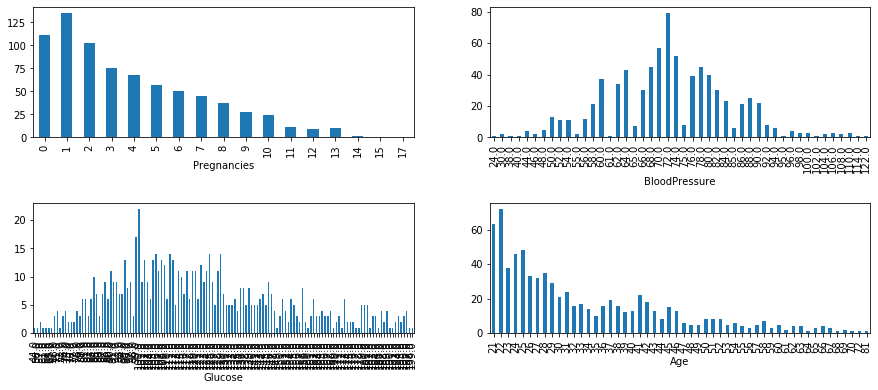

In [575]:
fig3, axes = plt.subplots(2, 2)
pima_df_NC.groupby(['Pregnancies']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[0, 0], figsize = (15, 6))
pima_df_NC.groupby(['Glucose']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[1, 0], figsize = (15, 6))
pima_df_NC.groupby(['BloodPressure']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[0, 1], figsize = (15, 6))
pima_df_NC.groupby(['Age']).count().iloc[:, 0].plot(kind = 'bar', ax = axes[1, 1], figsize = (15, 6))

plt.subplots_adjust(hspace = 0.5)

In [576]:
outcome = pima_df_NC['Outcome']
data=pima_df_NC[pima_df_NC.columns[:5]]
train,test=train_test_split(pima_df_NC,test_size=0.25,random_state=0,stratify=pima_df_use['Outcome'])
train_X_NC=train[train.columns[:5]]
test_X_NC=test[test.columns[:5]]
train_Y_NC=train['Outcome']
test_Y_NC=test['Outcome']

Accuracy of SVM :  0.6510416666666666
Accuracy of Logistic :  0.7864583333333334
Accuracy of DT :  0.7291666666666666


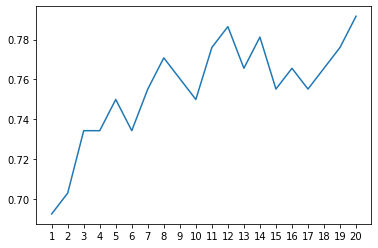

Accuracies for different values of n are: [0.69270833 0.703125   0.734375   0.734375   0.75       0.734375
 0.75520833 0.77083333 0.76041667 0.75       0.77604167 0.78645833
 0.765625   0.78125    0.75520833 0.765625   0.75520833 0.765625
 0.77604167 0.79166667]
Accuracy of KNN :  0.7916666666666666
Accuracy of LDA :  0.7604166666666666


In [620]:
model_svm_NC = svm.SVC(probability = True)
model_svm_NC.fit(train_X_NC, train_Y_NC)
predict_svm_NC = model_svm_NC.predict(test_X_NC)
#result_svm_NC = cross_val_score(model_svm_use, X_NC, Y_NC, cv = kfold, scoring = 'accuracy')
print("Accuracy of SVM : ", (test_Y_NC == predict_svm_NC).sum()/192)
result_SVM_NC = (test_Y_NC == predict_svm_NC).sum()/192

model_Logistic_NC = LogisticRegression()
model_Logistic_NC.fit(train_X_NC, train_Y_NC)
predict_Logistic_NC = model_Logistic_NC.predict(test_X_NC)
#result_Logistic_NC = cross_val_score(model_Logistic_use, X_NC, Y_NC, cv = kfold, scoring = 'accuracy')
print("Accuracy of Logistic : ", (test_Y_NC == predict_Logistic_NC).sum()/192)
result_Logistic_NC = (test_Y_NC == predict_Logistic_NC).sum()/192

model_DT_NC = DecisionTreeClassifier()
model_DT_NC.fit(train_X_NC, train_Y_NC)
predict_DT_NC = model_DT_NC.predict(test_X_NC)
#result_DT_NC = cross_val_score(model_DT_use, X_NC, Y_NC, cv = kfold, scoring = 'accuracy')
print("Accuracy of DT : ", (test_Y_NC == predict_DT_NC).sum()/192)
result_DT_NC = (test_Y_NC == predict_DT_NC).sum()/192

node_num_idx = [i for i in range(1, 21)]
node_num = pd.Series()
for i in list(range(1,21)):
    model_KNN = KNeighborsClassifier(n_neighbors=i) 
    model_KNN.fit(train_X_NC, train_Y_NC)
    prediction = model_KNN.predict(test_X_NC)
    node_num = node_num.append(pd.Series(metrics.accuracy_score(prediction,test_Y_NC)))
    
    
plt.plot(node_num_idx, node_num)
plt.xticks(node_num_idx)
plt.show()
print('Accuracies for different values of n are:',node_num.values)

model_KNN_NC = KNeighborsClassifier(n_neighbors=20) 
model_KNN_NC.fit(train_X_NC, train_Y_NC)
predict_KNN_NC = model_KNN_NC.predict(test_X_NC)
#result_KNN_NC = cross_val_score(model_KNN_use, X_NC, Y_NC, cv = kfold, scoring = 'accuracy')
print("Accuracy of KNN : ", (test_Y_NC == predict_KNN_NC).sum()/192)
result_KNN_NC = (test_Y_NC == predict_KNN_NC).sum()/192

model_LDA_NC = LinearDiscriminantAnalysis()
model_LDA_NC.fit(train_X_NC, train_Y_NC)
predict_LDA_NC = model_LDA_NC.predict(test_X_NC)
#result_LDA_NC = cross_val_score(model_LDA_use, X_NC, Y_NC, cv = kfold, scoring = 'accuracy')
print("Accuracy of LDA : ", (test_Y_NC == predict_LDA_NC).sum()/192)
result_LDA_NC = (test_Y_NC == predict_LDA_NC).sum()/192

In [578]:
acc_df = pd.DataFrame([result_svm, result_Logistic, result_DT, result_KNN, result_LDA],
                      index = ['SVM', 'Logistic', 'DT', 'KNN', 'LDA'],
                      columns = ['No'])

In [579]:
acc_df['USE'] = [result_SVM_use, result_Logistic_use, result_DT_use, result_KNN_use, result_LDA_use]
acc_df['NC'] = [result_SVM_NC, result_Logistic_NC, result_DT_NC, result_KNN_NC, result_LDA_NC]

In [580]:
acc_df

,No,USE,NC
SVM,0.673469,0.651042,0.651042
Logistic,0.775510,0.776042,0.786458
DT,0.714286,0.781250,0.760417
KNN,0.775510,0.776042,0.791667
LDA,0.795918,0.781250,0.760417


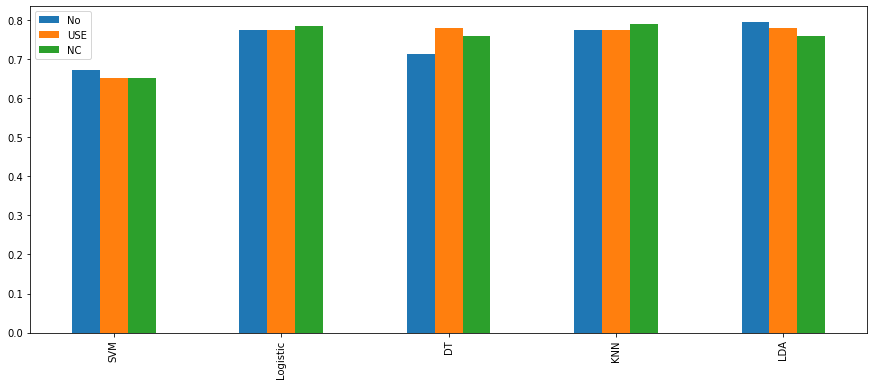

In [581]:
acc_df.plot(kind = 'bar', figsize = (15, 6))

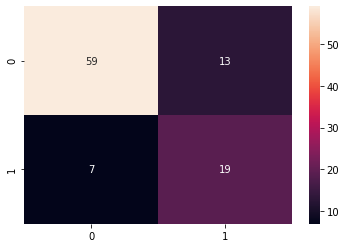

In [592]:
sns.heatmap(confusion_matrix(prediction_LDA, test_Y), annot=True, fmt='d')

In [605]:
print("-----------------------------------------------------")
print(classification_report(test_Y, prediction_LDA))
print("-----------------------------------------------------")

# Accuracy : 실제로 당뇨/당뇨가 아닌 사람을 맞춘 비율 = (TP+TN)/(TP+TN+FP+FN)
# Precision : 당뇨라고 예측한 거 중에서 실제 당뇨인 사람의 비율/당뇨가 아니라고 예측한 거 중에서 실제로 당뇨가 아닌 사람의 비율 = TP/(TP+FP)
# Recall : 당뇨 중에서 당뇨라고 예측한 사람의 비율/당뇨가 아닌 사람 중에서 당뇨가 아니라고 예측한 사람의 비율 = TP/(TP+FN)

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        66
           1       0.73      0.59      0.66        32

    accuracy                           0.80        98
   macro avg       0.78      0.74      0.76        98
weighted avg       0.79      0.80      0.79        98

-----------------------------------------------------


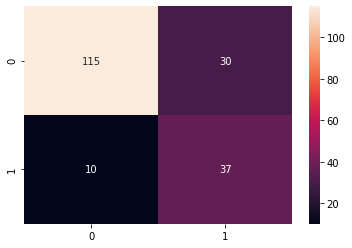

In [595]:
sns.heatmap(confusion_matrix(predict_KNN_NC, test_Y_NC), annot=True, fmt='d')

In [596]:
print("-----------------------------------------------------")
print(classification_report(test_Y_NC, predict_KNN_NC))
print("-----------------------------------------------------")

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       125
           1       0.79      0.55      0.65        67

    accuracy                           0.79       192
   macro avg       0.79      0.74      0.75       192
weighted avg       0.79      0.79      0.78       192

-----------------------------------------------------


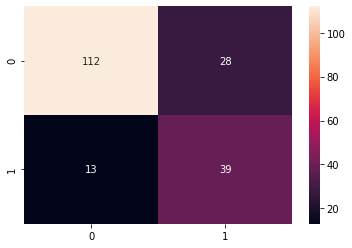

In [597]:
sns.heatmap(confusion_matrix(predict_Logistic_NC, test_Y_NC), annot=True, fmt='d')

In [598]:
print("-----------------------------------------------------")
print(classification_report(test_Y_NC, predict_Logistic_NC))
print("-----------------------------------------------------")

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       125
           1       0.75      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192

-----------------------------------------------------


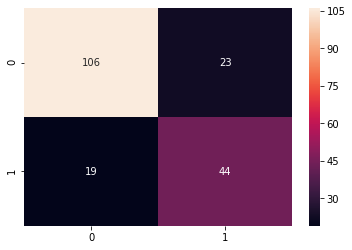

In [599]:
sns.heatmap(confusion_matrix(predict_DT_use, test_Y_use), annot=True, fmt='d')

In [600]:
print("-----------------------------------------------------")
print(classification_report(test_Y_use, predict_DT_use))
print("-----------------------------------------------------")

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       125
           1       0.70      0.66      0.68        67

    accuracy                           0.78       192
   macro avg       0.76      0.75      0.76       192
weighted avg       0.78      0.78      0.78       192

-----------------------------------------------------


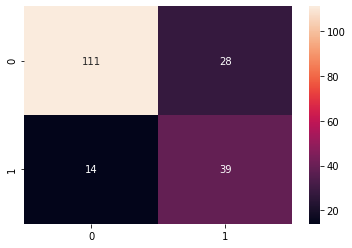

In [601]:
sns.heatmap(confusion_matrix(predict_LDA_use, test_Y_use), annot=True, fmt='d')

In [602]:
print("-----------------------------------------------------")
print(classification_report(test_Y_use, predict_LDA_use))
print("-----------------------------------------------------")

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       125
           1       0.74      0.58      0.65        67

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.77       192

-----------------------------------------------------


In [699]:
voting_NC = VotingClassifier(
    estimators=[('log', model_Logistic_NC), ('DT', model_DT_NC), ('KNN', model_KNN_NC), ('LDA', model_LDA_NC)],
    voting='soft')

voting_NC.fit(train_X_NC, train_Y_NC)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DT',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None...
                                        

In [700]:
predict_vote_NC = voting_NC.predict(test_X_NC)

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       132
           1       0.64      0.72      0.68        60

    accuracy                           0.79       192
   macro avg       0.75      0.77      0.76       192
weighted avg       0.79      0.79      0.79       192

-----------------------------------------------------


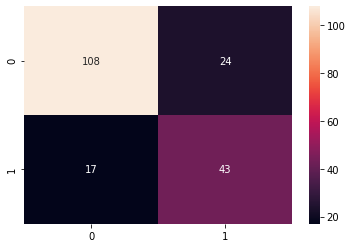

In [701]:
sns.heatmap(confusion_matrix(predict_vote_NC, test_Y_NC), annot=True, fmt='d')
print("-----------------------------------------------------")
print(classification_report(predict_vote_NC, test_Y_NC))
print("-----------------------------------------------------")

In [679]:
bagging_NC = BaggingClassifier(
    model_KNN_NC, n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42, oob_score = True)

bagging_NC.fit(train_X_NC, train_Y_NC)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=20, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42, verbose=0, warm_start=False)

In [686]:
predict_bag_NC = bagging_NC.predict(test_X_NC)

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       144
           1       0.52      0.73      0.61        48

    accuracy                           0.77       192
   macro avg       0.71      0.75      0.72       192
weighted avg       0.80      0.77      0.78       192

-----------------------------------------------------


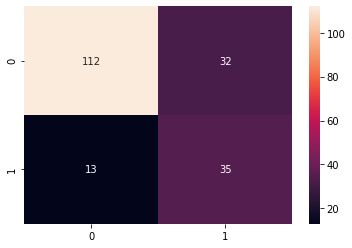

In [687]:
sns.heatmap(confusion_matrix(predict_bag_NC, test_Y_NC), annot=True, fmt='d')
print("-----------------------------------------------------")
print(classification_report(predict_bag_NC, test_Y_NC))
print("-----------------------------------------------------")

In [690]:
ExtraTrees_NC = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

ExtraTrees_NC.fit(train_X_NC, train_Y_NC)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=16,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [691]:
predict_EXT_NC = ExtraTrees_NC.predict(test_X_NC)

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       146
           1       0.52      0.76      0.62        46

    accuracy                           0.78       192
   macro avg       0.72      0.77      0.73       192
weighted avg       0.82      0.78      0.79       192

-----------------------------------------------------


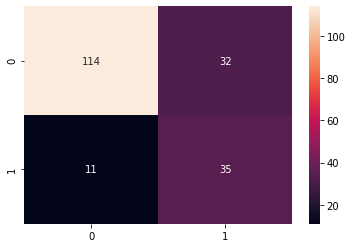

In [692]:
sns.heatmap(confusion_matrix(predict_EXT_NC, test_Y_NC), annot=True, fmt='d')
print("-----------------------------------------------------")
print(classification_report(predict_EXT_NC, test_Y_NC))
print("-----------------------------------------------------")

In [695]:
AdaBoostClassifier

ADA_NC = AdaBoostClassifier(
    model_DT_NC, n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

ADA_NC.fit(train_X_NC, train_Y_NC)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [696]:
predict_ADA_NC = ADA_NC.predict(test_X_NC)

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       137
           1       0.51      0.62      0.56        55

    accuracy                           0.72       192
   macro avg       0.67      0.69      0.68       192
weighted avg       0.74      0.72      0.73       192

-----------------------------------------------------


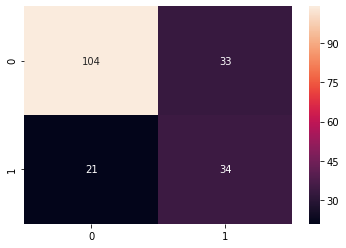

In [698]:
sns.heatmap(confusion_matrix(predict_ADA_NC, test_Y_NC), annot=True, fmt='d')
print("-----------------------------------------------------")
print(classification_report(predict_ADA_NC, test_Y_NC))
print("-----------------------------------------------------")

In [1048]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [1144]:
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [1210]:
diabete = pd.read_csv('/root/nims_academy/Pima/data/diabetes.csv')

In [1212]:
diabete.Glucose.replace(0, np.nan, inplace = True)
diabete.BloodPressure.replace(0, np.nan, inplace = True)
diabete.SkinThickness.replace(0, np.nan, inplace = True)
diabete.Insulin.replace(0, np.nan, inplace = True)
diabete.BMI.replace(0, np.nan, inplace = True)

In [1216]:
diabete.Glucose = diabete.Glucose.fillna(100)
diabete.BMI = diabete.BMI.fillna(diabete.BMI.mean())
diabete.BloodPressure = diabete.BloodPressure.fillna(int(diabete.BloodPressure.mean()))

In [1221]:
diabete = diabete.dropna()

In [1231]:
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [1228]:
insulin = diabete.iloc[:, 0:8].values

In [1229]:
insulin

array([[  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
       ...,
       [  2.   ,  88.   ,  58.   , ...,  28.4  ,   0.766,  22.   ],
       [ 10.   , 101.   ,  76.   , ...,  32.9  ,   0.171,  63.   ],
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ]])

In [1145]:
X_NC = pima_df_NC.iloc[:,0:6]
Y_NC = pima_df_NC.iloc[:,6].values

scaler = StandardScaler()
X_NC = scaler.fit_transform(X_NC)

In [1178]:
Y_NC = to_categorical(Y_NC, 2)

In [1180]:
seed = 15
np.random.seed(seed)

In [1181]:
X_train, X_test, y_train, y_test = train_test_split(X_NC, Y_NC, test_size=0.2, random_state = np.random.seed(seed))
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.seed(seed))

In [1205]:
def pima_model() :
    model = Sequential()
    
    model.add(Dense(4, input_dim = 6, activation = 'relu'))
    
    model.add(Dense(216, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(8,  activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(4,  activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.1))
    
    model.add(Dense(2, activation = 'softmax'))

    model.summary()
    
    model.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])
    
    return model

In [1206]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_428 (Dense)            (None, 4)                 28        
_________________________________________________________________
dense_429 (Dense)            (None, 216)               1080      
_________________________________________________________________
dropout_55 (Dropout)         (None, 216)               0         
_________________________________________________________________
dense_430 (Dense)            (None, 128)               27776     
_________________________________________________________________
dropout_56 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_431 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_57 (Dropout)         (None, 64)                0         
__________

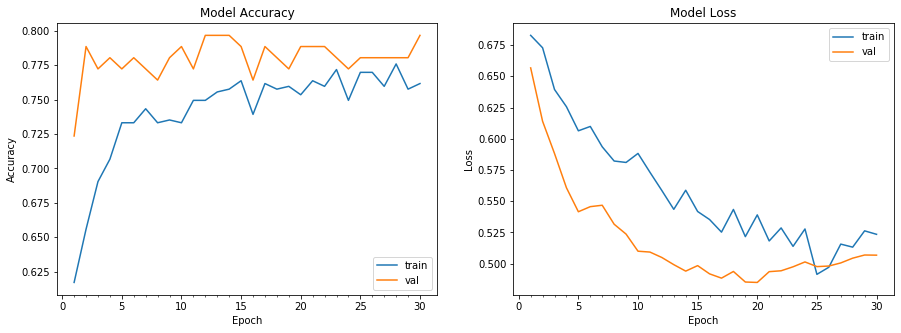

In [1207]:
model = pima_model()
history = model.fit(X_train, y_train, batch_size = 64, epochs = 1000, validation_data = (X_vali, y_vali), callbacks = [early_stopping])
plot_model_history(history)

In [1208]:
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_train, y_train)[1]))

491/491 [==============================] - 0s 389us/step

Accuracy: 0.7862


In [1209]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss_v = %f" % (accuracy, loss))

154/154 [==============================] - 0s 348us/step
Test: accuracy = 0.746753  ;  loss_v = 0.538406


In [1062]:
model1 = KerasClassifier(build_fn = pima_model, epochs = 150, verbose = 1)
model2 = KerasClassifier(build_fn = pima_model, epochs = 150, verbose = 1)

In [1063]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')
history = ensemble_clf.fit(X_train, y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 4)                 28        
_________________________________________________________________
dense_281 (Dense)            (None, 216)               1080      
_________________________________________________________________
dense_282 (Dense)            (None, 128)               27776     
_________________________________________________________________
dense_283 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_284 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_285 (Dense)            (None, 1)                 33        
Total params: 39,253
Trainable params: 39,253
Non-trainable params: 0
_________________________________________________________________
Epoch 

In [1064]:
y_pred = ensemble_clf.predict(X_test)

154/154 [==============================] - 2s 13ms/step


In [1065]:
accuracy_score(y_pred, y_test)

0.7467532467532467

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       104
           1       0.60      0.68      0.64        50

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.76      0.75      0.75       154

-----------------------------------------------------


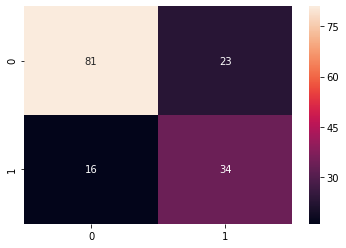

In [1066]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d')
print("-----------------------------------------------------")
print(classification_report(y_pred, y_test))
print("-----------------------------------------------------")

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       132
           1       0.64      0.72      0.68        60

    accuracy                           0.79       192
   macro avg       0.75      0.77      0.76       192
weighted avg       0.79      0.79      0.79       192

-----------------------------------------------------


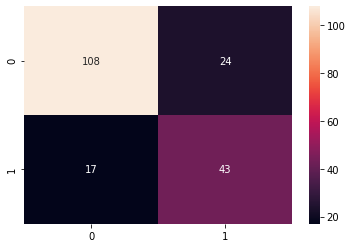

In [1067]:
sns.heatmap(confusion_matrix(predict_vote_NC, test_Y_NC), annot=True, fmt='d')
print("-----------------------------------------------------")
print(classification_report(predict_vote_NC, test_Y_NC))
print("-----------------------------------------------------")